# Image Processing SS 20 - Assignment 06

### Deadline is 03.06.2020 at 11:55 am

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.
Please strip the output from the cells, either select `Cell` -> `All Output` -> `Clear` or use the `nb_strip_output.py` script / git hook.

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.io.wavfile
from io import BytesIO
import urllib.request as urllib2
import ssl
import IPython.display as adt
ssl._create_default_https_context = ssl._create_unverified_context
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

# Exercise 1 - Crosscorrelation - 2 Points
Implement a function myCrossCorrelation, which takes two discrete functions in the form of arrays as an input and outputs the resulting crosscorrelation function. Now apply your correlation function as follows:
a) use as input function 1 an array of 10 random numbers (0-255), function 2 shall be [1], plot the two functions and the result of the crosscorrelation of both.
b) use the same function 1 as in a), function b) shall be [1 2 1]. Plot the two functions and the crosscorrelation of both.
c) repeat the first two tasks but swap the arguments

function 1: [ 23 254 235  97 108  74  84 233 172 122]
function 2: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Normalized crosscorrelation: 0.0457597513477575


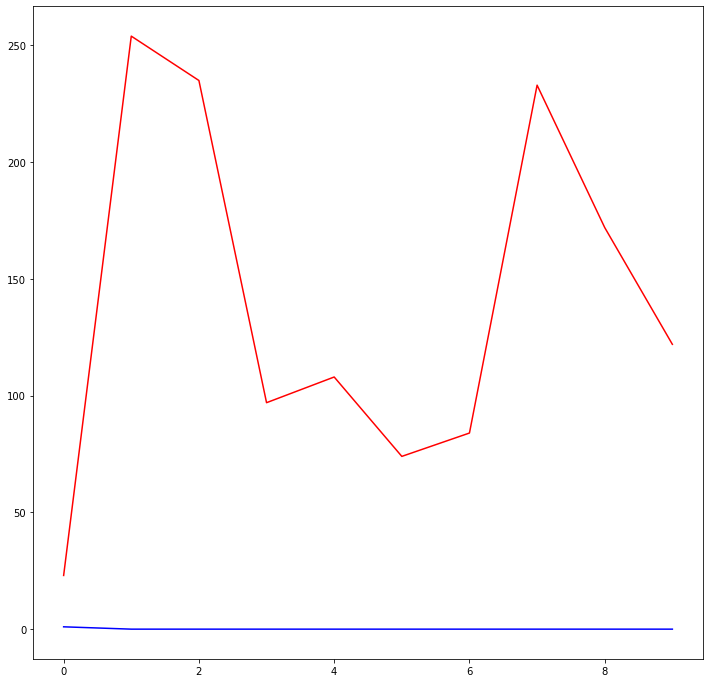

function 1: [ 23 254 235  97 108  74  84 233 172 122]
function 2: [1. 2. 1. 0. 0. 0. 0. 0. 0. 0.]
Normalized crosscorrelation: 0.6221698538689766


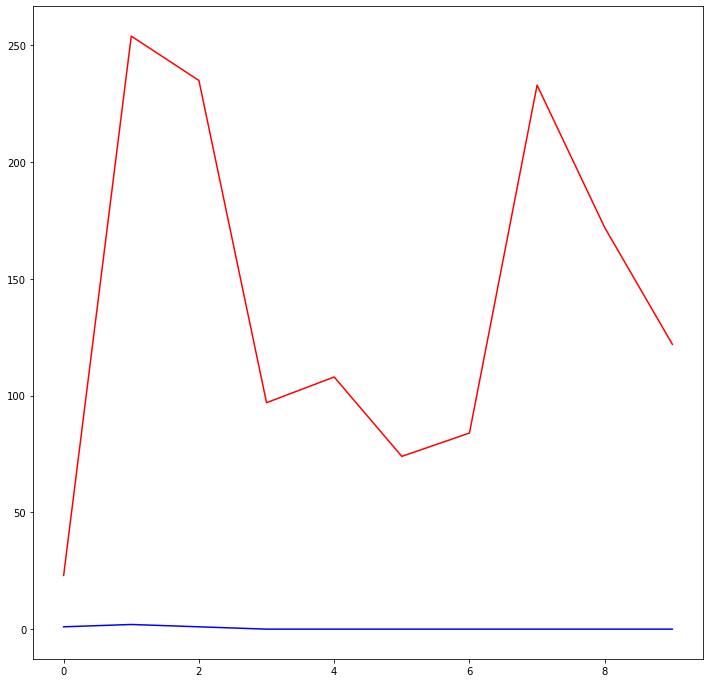

In [22]:
def make_lenghts_equal(func1, func2):
    # from matlab xcorr function: If x and y have different lengths, the function appends zeros 
    # to the end of the shorter vector so it has the same length as the other. 
    size_diff = np.size(func1) - np.size(func2) # positive if f1 > f2, negative if f1 < f2 
    nulls = np.zeros(size_diff)
    
    if size_diff < 0:
        func1 = np.append(func1, nulls)
    else:
        func2 = np.append(func2, nulls)
        
    return func1, func2

def myCrossCorrelation(func1, func2):
    # idea explanation: https://www.youtube.com/watch?v=ngEC3sXeUb4
    # https://anomaly.io/understand-auto-cross-correlation-normalized-shift/index.html    
    nom = func1 * func2
    
    sum1 = np.sum(func1**2)
    sum2 = np.sum(func2**2)
    
    dem = np.sqrt(sum1 * sum2)
    return np.sum(nom)/dem
    

foo1 = np.random.randint(0, 256, 10)
#print(foo1)
#foo2a = np.random.randint(0, 256, 10)
foo2a = np.array([1])
foo2b = np.array([1, 2, 1])

# ----- A -----
# compare lenghts and make them equal for crosscorrelation
foo1, foo2a = make_lenghts_equal(foo1, foo2a)

plt.plot(foo1, color='r')
plt.plot(foo2a, color='b')
print("function 1: {}".format(foo1))
print("function 2: {}".format(foo2a))
print("Normalized crosscorrelation: {}".format(myCrossCorrelation(foo1, foo2a)))
plt.show()

# ----- B -----
# compare lenghts and make them equal for crosscorrelation
foo1, foo2b = make_lenghts_equal(foo1, foo2b)

plt.plot(foo1, color='r')
plt.plot(foo2b, color='b')
print("function 1: {}".format(foo1))
print("function 2: {}".format(foo2b))
print("Normalized crosscorrelation: {}".format(myCrossCorrelation(foo1, foo2b)))
plt.show()

# ----- C1 -----
# compare lenghts and make them equal for crosscorrelation
foo2a, foo1 = make_lenghts_equal(foo2a, foo1)

plt.plot(foo2a, color='r')
plt.plot(foo1, color='b')
print("function 1: {}".format(foo2a))
print("function 2: {}".format(foo1))
print("Normalized crosscorrelation: {}".format(myCrossCorrelation(foo2a, foo1)))
plt.show()

# ----- B -----
# compare lenghts and make them equal for crosscorrelation
foo2b, foo1 = make_lenghts_equal(foo2b, foo1)

plt.plot(foo2b, color='r')
plt.plot(foo1, color='b')
print("function 1: {}".format(foo2b))
print("function 2: {}".format(foo1))
print("Normalized crosscorrelation: {}".format(myCrossCorrelation(foo2b, foo1)))
plt.show()

# Exercise 2 - Discrete Fourier Transformation - 4 Points
Implement the Discrete Fourier Transformation with [Matrix Multiplication](https://en.wikipedia.org/wiki/DFT_matrix).

In [ ]:
def dft_matrix(n):
    """
    Returns the Discrete Fourier Transformation Matrix of order `n`.
    """
    # your code here
    return np.zeros((n, n)) 

plt.subplot(121)
plt.imshow(dft_matrix(16))
plt.subplot(122)
plt.imshow(dft_matrix(32))
plt.show()

# Exercise 3 - Spectrogram - 4 Points

A [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) visualises the intensities of the different frequencies over time. On the x-axis is the time and on the y-axis are the frequencies.
Your task is to build the spectrogram of the given audio clip. If you failed to do exercise 2, you can use some library for the fourier transformation.

In [ ]:
def load_wav(url):
    f = urllib2.urlopen(url)
    buffer = BytesIO(f.read())
    sample_rate, audio = scipy.io.wavfile.read(buffer)
    if len(audio.shape) == 2:
        # only select one channel
        audio = audio[:, 0]
    return sample_rate, audio / audio.max()

In [ ]:
dolphines_url = "http://www.pmel.noaa.gov/acoustics/whales/sounds/whalewav/akhumphi1x.wav"
# some dolphin sounds
sample_rate, audio = load_wav(dolphines_url)

In [ ]:
print(audio.shape)

In [ ]:
# listen to the audio
adt.Audio(data=audio, rate=sample_rate)

In [ ]:
# plot the values.
plt.plot(audio)
plt.show()

In [ ]:
def spectogram(audio, window_size=500):
    """
    Builds the spectogram of the audio clip. Split the audio clip into buckets of `window_size` and 
    use the discrete fourier transformation to get the intensity of the frequencies.
    The entry at position (i, j) of the matrix is the intensity of the i-th frequencies in the j-th bucket.
    """
    # your code here
    return np.zeros((window_size // 2, len(audio) // window_size))

In [ ]:
specgram = spectogram(audio, window_size=500)

In [ ]:
im = plt.imshow(specgram)
plt.colorbar(im, fraction=0.02, pad=0.04)
plt.show()

In [ ]:
# plot it logarithmically
im = plt.imshow(specgram)    # your code here
plt.colorbar(im, fraction=0.02, pad=0.04)
plt.show()